In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Function for custom colormaps, from
# https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72

import matplotlib.colors as mcolors

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]
def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [3]:
comp_list = pd.read_csv('/wynton/group/capra/projects/modern_human_3Dgenome/results/comp_tables/pairwise_subsample_genomewide_averages.csv',
                       index_col=0)

In [4]:
all_indivs = list(set(comp_list.ind1.unique()) | set(comp_list.ind2.unique()))

In [5]:
i = all_indivs[0]
j = all_indivs[1]
df = pd.read_csv(f"{seqComps_dir}/SeqComps_{j}_vs_{i}.txt", sep="\t")

NameError: name 'seqComps_dir' is not defined

In [ ]:
df

,chrm,start_loc,AFR_LWK_female_NA19457_coverage,SAS_PJL_female_HG02649_coverage,seqComp_raw
0,chr1,0,0.847412,0.847412,0.9996223449707031
1,chr1,524288,0.952316,0.952316,0.9986839294433594
2,chr1,1048576,1.000000,1.000000,0.9983844757080078
3,chr1,1572864,1.000000,1.000000,0.9987115859985352
4,chr1,2097152,0.958507,0.958507,0.9988307952880859
...,...,...,...,...,...
5797,chrX,153092096,1.000000,1.000000,1.0
5798,chrX,153616384,1.000000,1.000000,1.0
5799,chrX,154140672,1.000000,1.000000,1.0
5800,chrX,154664960,1.000000,1.000000,0.9999980926513672


In [ ]:
df = df[df["%s_coverage"% i] >= 0.95]

In [ ]:
df['seqComp_raw'].astype('float').mean()

0.9987742222666995

In [ ]:
# Read in sequence-level comparisons between MH & AHs, organize into matrix

seqComps_dir = "/wynton/group/capra/projects/modern_human_3Dgenome/data/pairwise/sequence/1KGvs1KG"
count = 0
matrix_seq = pd.DataFrame(index=all_indivs, columns=all_indivs,dtype='float')
for i in all_indivs:
    for j in all_indivs:
        if i != j:
            try: 
                df = pd.read_csv(f"{seqComps_dir}/SeqComps_{i}_vs_{j}.txt", sep="\t")
                df = df[(df["%s_coverage"% i] >= 0.95) & (df["%s_coverage"% j] >= 0.95)]
                num = 1-df['seqComp_raw'].astype('float').mean()
                count +=1
            except FileNotFoundError:
                df = pd.read_csv(f"{seqComps_dir}/SeqComps_{j}_vs_{i}.txt", sep="\t")
                df = df[(df["%s_coverage"% i] >= 0.95) & (df["%s_coverage"% j] >= 0.95)]
                num = 1-df['seqComp_raw'].astype('float').mean()
                count +=1
            matrix_seq.loc[i,j] = num
            matrix_seq.loc[j,i] = num
        else:
            matrix_seq.loc[i,i] = 0
        if count%100 == 0:
            print(count)
            
# Shorten labels
matrix_seq.columns = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in matrix_seq.columns]
matrix_seq.index = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in matrix_seq.index]
matrix_seq.head()

,SAS_PJL_HG02649,AFR_LWK_NA19457,EAS_CDX_HG00864,SAS_STU_HG03836,EUR_GBR_HG00130,EUR_TSI_NA20505,EAS_JPT_NA19084,SAS_GIH_NA20882,EUR_GBR_HG00238,SAS_BEB_HG04171,...,EAS_JPT_NA18998,AFR_ASW_NA19917,AFR_ASW_NA20314,EAS_CDX_HG02188,AFR_MSL_HG03583,AMR_PUR_HG00638,AFR_ESN_HG03511,SAS_BEB_HG03611,AMR_PUR_HG01171,AFR_GWD_HG02814
SAS_PJL_HG02649,0.000000,0.001226,0.000887,0.000861,0.000854,0.000866,0.000896,0.000854,0.000855,0.000864,...,0.000899,0.001216,0.000865,0.000884,0.001262,0.000931,0.001248,0.000864,0.000935,0.001238
AFR_LWK_NA19457,0.001226,0.000000,0.001220,0.001223,0.001228,0.001225,0.001230,0.001227,0.001232,0.001235,...,0.001236,0.001224,0.001226,0.001221,0.001234,0.001224,0.001220,0.001230,0.001215,0.001221
EAS_CDX_HG00864,0.000887,0.001220,0.000000,0.000872,0.000904,0.000913,0.000742,0.000884,0.000903,0.000863,...,0.000750,0.001213,0.000833,0.000718,0.001257,0.000954,0.001246,0.000859,0.000954,0.001239
SAS_STU_HG03836,0.000861,0.001223,0.000872,0.000000,0.000876,0.000884,0.000872,0.000864,0.000878,0.000855,...,0.000886,0.001214,0.000874,0.000876,0.001261,0.000947,0.001245,0.000855,0.000944,0.001234
EUR_GBR_HG00130,0.000854,0.001228,0.000904,0.000876,0.000000,0.000821,0.000912,0.000868,0.000809,0.000888,...,0.000924,0.001210,0.000863,0.000911,0.001264,0.000902,0.001247,0.000889,0.000910,0.001240


In [6]:
df = comp_list[(comp_list.ind1 =="AFR_ASW_female_NA19917") & (comp_list.ind2 =="AFR_ASW_female_NA19901")]

In [7]:
a = float(df['avg_divergence'])

In [8]:
a

0.0038053034498568734

In [9]:
# Organized 3d-genome divergence comparisons between MH & AHs into a matrix

matrix_3d = pd.DataFrame(index=all_indivs, columns=all_indivs,dtype='float')
count = 0
for i in all_indivs:
    for j in all_indivs:
        dfi = comp_list[(comp_list.ind1 ==i) & (comp_list.ind2 ==j)]
        dfj = comp_list[(comp_list.ind1 ==j) & (comp_list.ind2 ==i)]
        if i != j and dfi.shape[0] == 1: 
            count +=1
            matrix_3d.loc[i,j] = float(dfi['avg_divergence'])
            matrix_3d.loc[j,i] = float(dfi['avg_divergence'])
        if i != j and dfj.shape[0] == 1:
            count +=1
            matrix_3d.loc[i,j] = float(dfj['avg_divergence'])
            matrix_3d.loc[j,i] = float(dfj['avg_divergence'])
        else:
            matrix_3d.loc[i,i] = 0
        if count%500 == 0:
            print(count)

# Shorten labels
matrix_3d.columns = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in matrix_3d.columns]
matrix_3d.index = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in matrix_3d.index]

matrix_3d.head()

0
500
1000
1500
2000
2500
3000
3500


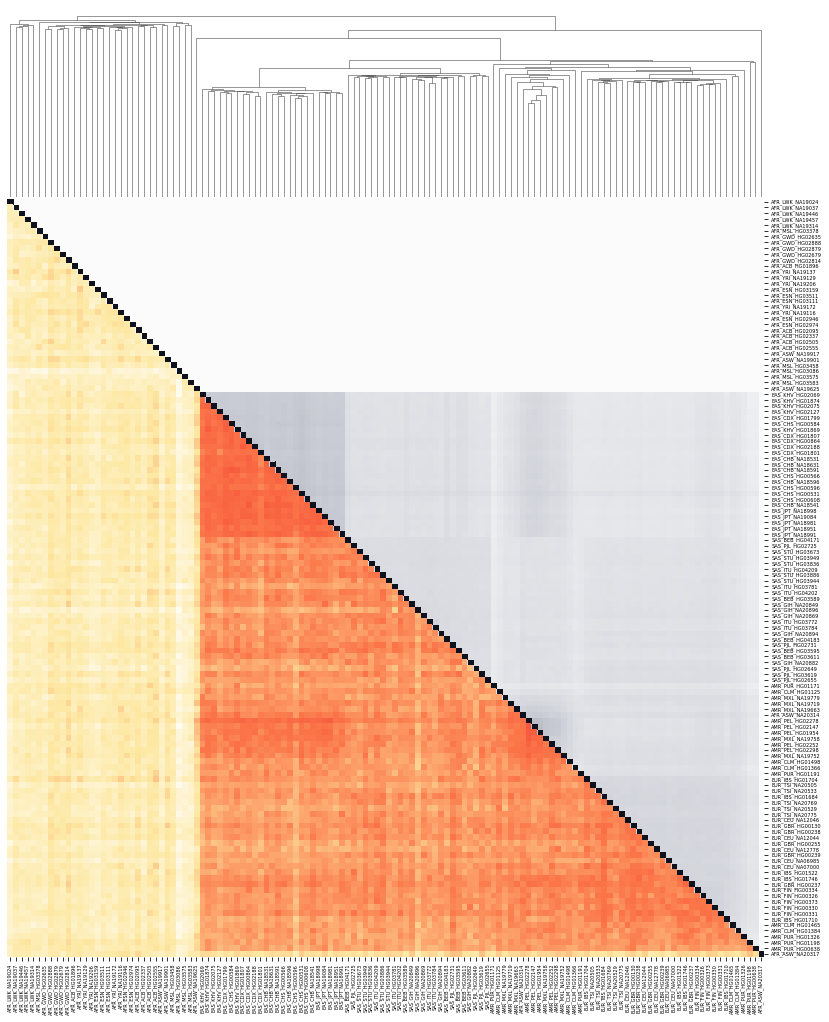

In [ ]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from matplotlib.patches import Rectangle

# colormaps
#cmap_seq = get_continuous_cmap(['#0e121ff','#9699a5','#c9ccd4','#fcfcfd'],float_list=[0, 0.40,0.58, 1])
cmap_3d = get_continuous_cmap(["#c5000e",'f44132','#fc774a',"fee8a1","#fffdf2"])
cmap_seq = get_continuous_cmap(['#0e121ff','#9699a5','#c9ccd4','#fcfcfd'])


# Linkage and cluster baseds on sequence
linkage = hc.linkage(sp.distance.squareform(matrix_seq), method='complete',optimal_ordering=True) # complete, single, average, weighted
g = sns.clustermap(matrix_seq*2**20, row_linkage=linkage,square=True, figsize=(15,15),col_linkage=linkage, cmap = cmap_seq, vmin=150, vmax=1100, yticklabels=True, xticklabels=True)

# Flip
g.ax_heatmap.invert_xaxis()
g.ax_heatmap.invert_yaxis()
g.ax_row_dendrogram.invert_yaxis()
g.ax_col_dendrogram.invert_xaxis()
_ = g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 5)
_ = g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 5)

# Color bottom triangle based on 3d genome

order = g.dendrogram_col.reordered_ind
order = [all_indivs[x] for x in order]
order = ["_".join(np.array(x.split("_"))[[0,1,3]]) if "_" in x else x for x in order]

ax = g.ax_heatmap

for i,indiv1 in enumerate(order):
    for j,indiv2 in enumerate(order):
        if i > j:
            _ = ax.add_patch(Rectangle((i-.03, j), 1.2, 1, fc=cmap_3d((matrix_3d.loc[indiv1,indiv2]-0.00043)/(0.00476-0.00043)),linewidth=0,ec=None))

g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
#plt.savefig("heatmap3dandSeq.pdf");
#plt.savefig("/home/mcarthe/heatmap3dandSeq.pdf");

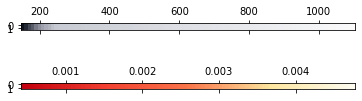

In [138]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,2));

ax[0].matshow(np.array([np.linspace(150,1100,100),np.linspace(150,1100,100)]), cmap=cmap_seq, vmin=150, vmax=1100);
# vrange: 150 - 1100
#(m - rmin)/(rmax - rmin) * (tmax - tmin) + tmin
ax[0].set_xticks([((x - 150)/(1100 - 150) * 99) for x in np.arange(200,1100,200)]);
ax[0].set_xticklabels(np.arange(200,1100,200));

ax[1].matshow(np.array([np.linspace(0,1,100),np.linspace(0,1,100)]), cmap= cmap_3d);
# vrange = 0.00043 - 0.00476
ax[1].set_xticks([((x - 0.00043)/(0.00476 - 0.00043) * 99) for x in np.arange(0.001,0.00476,0.001)]);
ax[1].set_xticklabels(np.arange(0.001,0.00476,0.001));

In [118]:
!owd

/bin/bash: owd: command not found


In [119]:
!pwd

/wynton/group/capra/projects/modern_human_3Dgenome/bin/activeNotebooks


In [147]:
np.nanmean(matrix_seq)

0.0010272449125470645